# Notebook 02: Data exploration

In [1]:
import pandas as pd
import os
import sys

sys.path.append(os.path.abspath(os.path.join(os.path.dirname("notebooks"), '..')))

from utils.func_preprocessing import *
from utils.func_classification import *
from utils.utils import map_diagn_out
from utils.func_plot import plot_correlation_matrix, plot_feature_distribution

import pandas as pd

from sklearn.preprocessing import MinMaxScaler

from config.config import DATASET_NAME, N_CLASS

import ipywidgets as widgets

from IPython.display import display, clear_output

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# from ipywidgets import Output

In [3]:
df = pd.read_csv(f"../dataset/{DATASET_NAME}.csv")
# Drop 'Unnamed: 0' column if it exists
if "Unnamed: 0" in df.columns:
    df = df.drop(columns=["Unnamed: 0"])

/var/folders/yt/xg_5dkfj5sqf8jh1hbyzy1440000gn/T/ipykernel_89846/2882695176.py:1: DtypeWarning: Columns (8,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"../dataset/{DATASET_NAME}.csv")


In [4]:
if N_CLASS == 6:
    df['y'] = df.apply(lambda row: class_macropat_letteremappate(row['lettera_diagnosi_princip'], row['intero_diagnosi_princip']), axis=1)
    df['y'] = df.y.apply(reduce_6class_letteremappate)
    df['y_desc'] = df.y.apply(map_diagn_out)

In [5]:
df.shape

(28688, 49)

### Correlation Matrix

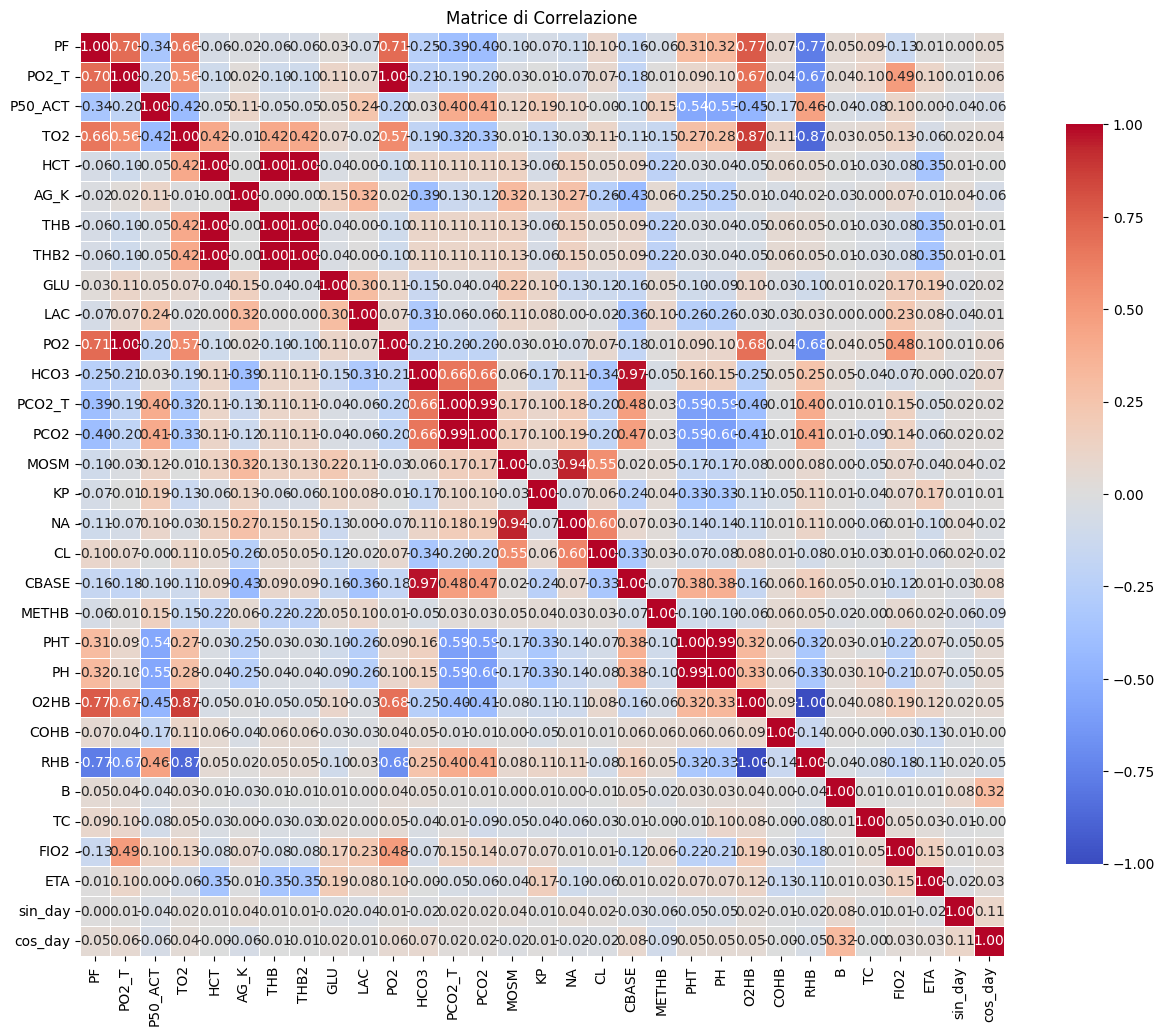

In [6]:
columns = ['PF', 'PO2_T', 'P50_ACT', 'TO2', 'HCT', 'AG_K',
       'THB', 'THB2', 'GLU', 'LAC', 'PO2', 'HCO3', 'PCO2_T', 'PCO2', 'MOSM',
       'KP', 'NA', 'CL', 'CBASE', 'METHB', 'PHT', 'PH', 'O2HB', 'COHB', 'RHB',
       'B', 'TC', 'FIO2','DATA', 'ETA']

plot_correlation_matrix(df, columns=columns)

## Distribuzioni rispetto alle classi

In [7]:
features = [
    'ETA', 'PF', 'PO2_T', 'P50_ACT', 'TO2', 'SO2', 'HCT', 'AG_K', 
    'THB', 'THB2', 'GLU', 'LAC', 'PO2', 'HCO3', 'PCO2_T', 'PCO2', 
    'MOSM', 'KP', 'NA', 'CL', 'CBASE', 'METHB', 'PHT', 'PH', 
    'O2HB', 'COHB', 'RHB', 'B', 'TC', 'FIO2'
]

feature_dropdown = widgets.Dropdown(
    options=features,
    value=features[0],
    description='Feature:',
    disabled=False,
)

def on_feature_change(change):
    clear_output()
    display(feature_dropdown)
    if change['type'] == 'change' and change['name'] == 'value':
        fig = plot_feature_distribution(df.sort_values(by=["y_desc"]), change['new'])
        display(fig, display_id=True)

feature_dropdown.observe(on_feature_change, names='value')

# Display initial plot
on_feature_change({'type': 'change', 'name': 'value', 'new': features[0]})

Dropdown(description='Feature:', index=1, options=('ETA', 'PF', 'PO2_T', 'P50_ACT', 'TO2', 'SO2', 'HCT', 'AG_K…

None

### Trasformazioni di variabile

In [8]:
# # Copia del DataFrame
# df_transformed = df.copy()

# # Variabili con distribuzione sbilanciata a destra (Logaritmo normale)
# df_transformed['O2HB'] = np.log1p(df_transformed['O2HB'])  # np.log1p gestisce automaticamente i valori nulli e zero

# # Variabili con distribuzione sbilanciata a sinistra (logaritmo del valore negativo)
# for col in ['COHB', 'GLU', 'LAC', 'P50_ACT', 'PF', 'PO2_T']:
#     df_transformed[col] = np.log1p(-df_transformed[col])  # -df[col] per rendere positiva la distribuzione

# # Normalizzazione Min-Max per le variabili indicate
# scaler = MinMaxScaler()
# cols_to_scale = ['B', 'CBASE', 'METHB', 'PHT', 'CL', 'NA', 'KP', 'HCO3', 'PCO2_T', 'MOSM', 'THB2', 'TO2', 'ETA']
# df_transformed[cols_to_scale] = scaler.fit_transform(df_transformed[cols_to_scale])

# # Trasformazione categorica
# df_transformed['FIO2'] = df_transformed['FIO2'].astype('category')  # Converte in variabile categorica

# # Arrotonda 'TC' a 0.5 e converte in categorico
# df_transformed['TC'] = (df_transformed['TC'] / 0.5).round() * 0.5
# df_transformed['TC'] = df_transformed['TC'].astype('category')